# Import a Python package

In [240]:
#importing the python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [241]:
#To importing the dataset
data=pd.read_csv("diabetes_dataset.csv")

In [242]:
data.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [244]:
data.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


# Data cleaning

<AxesSubplot:>

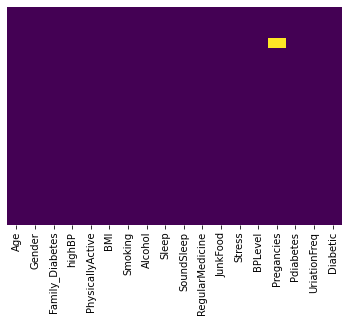

In [245]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We can see that most of the null values are clustered in the "Pregnancy" column To fill in these missing values, we divided the entire dataset into four groups according to the age range, for the female observation with the missing pregnancy value, we filled in the average pregnancy value of the age group in which the observation was made, and for the male observation, we only filled in 0.

<AxesSubplot:xlabel='Age', ylabel='Pregancies'>

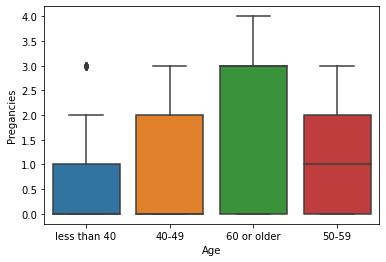

In [246]:
#To find avg num of pregnancies for diff age groups
sns.boxplot(data = data[data['Gender'] == 'Female'], x='Age', y='Pregancies')

In [247]:
diabetes_fm = data[data['Gender'] == 'Female']
diabetes_fm_40 = diabetes_fm[diabetes_fm['Age'] == 'less than 40']
diabetes_fm_50 = diabetes_fm[diabetes_fm['Age'] == '40-49']
diabetes_fm_60 = diabetes_fm[diabetes_fm['Age'] == '50-59']
diabetes_fm_over60 = diabetes_fm[diabetes_fm['Age'] == '60 or older']
print(f'mean number of pregnancies for ages less than 40 is', np.mean(diabetes_fm_40['Pregancies']))
print(f'mean number of pregnacnices for ages 40-49 is', np.mean(diabetes_fm_50['Pregancies']))
print(f'mean number of pregnancies for ages 50-59 is', np.mean(diabetes_fm_60['Pregancies']))
print(f'mean number of pregnancies for ages 60 or older is', np.mean(diabetes_fm_over60['Pregancies']))
# round off number of pregnancies to nearest whole number
preg_40 = round(np.mean(diabetes_fm_40['Pregancies']))
preg_50 = round(np.mean(diabetes_fm_50['Pregancies']))
preg_60 = round(np.mean(diabetes_fm_60['Pregancies']))
preg_over60 = round(np.mean(diabetes_fm_over60['Pregancies']))

mean number of pregnancies for ages less than 40 is 0.5748502994011976
mean number of pregnacnices for ages 40-49 is 1.1176470588235294
mean number of pregnancies for ages 50-59 is 1.0
mean number of pregnancies for ages 60 or older is 2.0392156862745097


In [248]:
def impute_pregnancy(df):
    Age_group = df[0]
    Gender = df[1]
    num_of_pregnancies = df[2]
    
    if pd.isnull(num_of_pregnancies):
        if Gender == 'Male':
            return 0.0
        elif Age_group == 'less than 40':
            return preg_40
        elif Age_group == '40-49':
            return preg_50
        elif Age_group == '50-59':
            return preg_60
        elif Age_group == '60 or older':
            return preg_over60
    else:
        return num_of_pregnancies

In [249]:
data['Pregancies'] = data[['Age','Gender','Pregancies']].apply(impute_pregnancy,axis=1)

<AxesSubplot:>

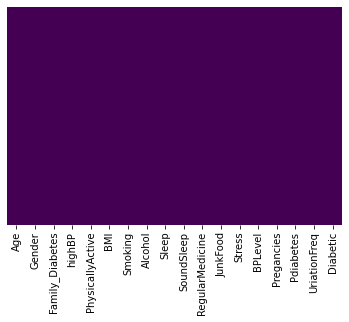

In [250]:
#Now we have successfully removed the missing values in the pregnancy column
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Create dummy variables

In [251]:
data['Gender'].replace(to_replace = ['Male', 'Female'], value = [0, 1], inplace = True)

def binary_converter(cols):
    Family_Diabetes = cols
    
    if Family_Diabetes == 'no':
        return 0
    elif Family_Diabetes == 'yes':
        return 1
def binary_converter2(cols):
    UriationFreq = cols
    
    if UriationFreq  == 'not much':
        return 0
    elif UriationFreq  == 'quite often':
        return 1

In [252]:
data['Family_Diabetes'] = data['Family_Diabetes'].apply(binary_converter)
data['Smoking'] = data['Smoking'].apply(binary_converter)
data['Alcohol'] = data['Alcohol'].apply(binary_converter)
data['RegularMedicine'] = data['RegularMedicine'].apply(binary_converter)
data['Diabetic'] = data['Diabetic'].apply(binary_converter)
data['UriationFreq'] = data['UriationFreq'].apply(binary_converter2)

In [253]:
data.head(10)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,0,0,yes,one hr or more,39.0,0,0,8,6,0.0,occasionally,sometimes,high,0.0,0,0,0.0
1,50-59,0,0,yes,less than half an hr,28.0,0,0,8,6,1.0,very often,sometimes,normal,0.0,0,0,0.0
2,40-49,0,0,no,one hr or more,24.0,0,0,6,6,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
3,50-59,0,0,no,one hr or more,23.0,0,0,8,6,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
4,40-49,0,0,no,less than half an hr,27.0,0,0,8,8,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
5,40-49,0,0,yes,none,21.0,0,1,10,10,0.0,occasionally,sometimes,high,0.0,0,0,1.0
6,less than 40,0,0,no,one hr or more,24.0,0,0,8,8,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
7,less than 40,0,0,no,less than half an hr,20.0,0,0,7,7,1.0,occasionally,sometimes,low,0.0,0,0,0.0
8,40-49,0,1,no,one hr or more,23.0,0,0,7,7,0.0,occasionally,sometimes,normal,0.0,0,0,0.0
9,less than 40,0,0,no,more than half an hr,20.0,0,0,8,8,NaN,occasionally,sometimes,normal,0.0,0,0,0.0


IN With this step, we convert all the values of the above six columns to 0 and 1, with 0 being no and 1 being yes

In [254]:
#highBP column largely extraneous given BPlevel column... drop from dataset
data.drop(['highBP'], axis = 1, inplace=True)

In [255]:
data['BPLevel'].nunique()
data['BPLevel'].value_counts()

normal     707
high       211
low         25
High         5
Low          3
normal       1
Name: BPLevel, dtype: int64

In [256]:
def lowerupper(col):
    if col == 'Low':
        return 'low'
    elif col == 'High':
        return 'high'
    elif col == 'normal ':
        return 'normal'
    else:
        return col
    
def lowerupper2(col):
    if col == 'no ':
        return 'no'
    elif col == ' no':
        return 'no'
    else:
        return col

In [257]:
data['BPLevel'] = data['BPLevel'].apply(lowerupper)
data['Diabetic'] = data['Diabetic'].apply(lowerupper2)

In [258]:
data['JunkFood'].nunique()

4

In [259]:
data['JunkFood'].value_counts()

occasionally    672
often           184
very often       52
always           44
Name: JunkFood, dtype: int64

In [260]:
data['Stress'].nunique()

4

In [261]:
data['Stress'].value_counts()

sometimes     564
very often    164
not at all    136
always         88
Name: Stress, dtype: int64

In [262]:
data['PhysicallyActive'].nunique()

4

In [263]:
data['PhysicallyActive'].value_counts()

less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64

In [264]:
data['Age'].nunique()

4

In [265]:
data['Age'].value_counts()

less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64

In [266]:
BP_level = pd.get_dummies(data['BPLevel'], drop_first = True)
data.drop(['BPLevel'], axis=1, inplace = True)
data = pd.concat([data, BP_level], axis = 1)

Stress = pd.get_dummies(data['Stress'], drop_first = True)
data.drop(['Stress'], axis = 1, inplace = True)
data = pd.concat([data, Stress], axis = 1)

JunkFood = pd.get_dummies(data['JunkFood'], drop_first = True)
data.drop(['JunkFood'], axis = 1, inplace = True)
data = pd.concat([data, JunkFood], axis = 1)

PhysicallyActive = pd.get_dummies(data['PhysicallyActive'], drop_first = True)
data.drop(['PhysicallyActive'], axis = 1, inplace = True)
data = pd.concat([data, PhysicallyActive], axis = 1)

Age = pd.get_dummies(data['Age'], drop_first = True)
data.drop(['Age'], axis = 1, inplace = True)
data = pd.concat([data, Age], axis = 1)

In [267]:
pd.set_option('display.max_columns', None)
data.head()

,Gender,Family_Diabetes,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,Pregancies,Pdiabetes,UriationFreq,Diabetic,low,normal,not at all,sometimes,very often,occasionally,often,very often,more than half an hr,none,one hr or more,50-59,60 or older,less than 40
0,0,0,39.0,0,0,8,6,0.0,0.0,0,0,0.0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
1,0,0,28.0,0,0,8,6,1.0,0.0,0,0,0.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,0,0,24.0,0,0,6,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
3,0,0,23.0,0,0,8,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
4,0,0,27.0,0,0,8,8,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [268]:
data['Pdiabetes'].nunique()
data['Pdiabetes'].value_counts()
type(data['Pdiabetes'][0])

str

In [269]:
def pdiabetes_converter(pdiabetes):
    if pdiabetes == 'yes':
        return 1
    elif pdiabetes == 'no':
        return 0
    else:
        return 0

In [270]:
data['Pdiabetes'] = data['Pdiabetes'].apply(pdiabetes_converter)

In [271]:
data[data['Gender']==0]['Pdiabetes'].value_counts()

0    579
1      1
Name: Pdiabetes, dtype: int64

In [272]:
data.drop(data[(data['Gender']==0) & (data['Pdiabetes']==1)].index,inplace=True)

In [273]:
data.head()

,Gender,Family_Diabetes,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,Pregancies,Pdiabetes,UriationFreq,Diabetic,low,normal,not at all,sometimes,very often,occasionally,often,very often,more than half an hr,none,one hr or more,50-59,60 or older,less than 40
0,0,0,39.0,0,0,8,6,0.0,0.0,0,0,0.0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
1,0,0,28.0,0,0,8,6,1.0,0.0,0,0,0.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,0,0,24.0,0,0,6,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
3,0,0,23.0,0,0,8,6,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
4,0,0,27.0,0,0,8,8,0.0,0.0,0,0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [274]:
#To rename the columns names
data.rename(columns = {'low':'low BP', 'normal':'normal BP',
                              'not at all':'no stress', 'sometimes':'occasional stress',
                          'very often':'high stress', 'occasionally':'healthy diet', 'often': 'unhealthy diet',
                          'very often': 'very unhealthy diet', 'more than half an hr': '0.5+ hr exercise',
                          'none': '0 hr exercise', 'one hr or more':'1+ hr exercise','Pregancies':'pregnancies'}, inplace = True)

In [275]:
diabetes2 = data['very unhealthy diet']
data.drop('very unhealthy diet', axis = 1, inplace = True)
diabetes2.columns = ['high stress', 'very unhealthy diet']
diabetes2
data = pd.concat([data, diabetes2], axis = 1)

In [276]:
data.dropna(inplace = True)
data.describe()
data.head()

,Gender,Family_Diabetes,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,pregnancies,Pdiabetes,UriationFreq,Diabetic,low BP,normal BP,no stress,occasional stress,healthy diet,unhealthy diet,0.5+ hr exercise,0 hr exercise,1+ hr exercise,50-59,60 or older,less than 40,high stress,very unhealthy diet
0,0,0,39.0,0,0,8,6,0.0,0.0,0,0,0.0,0,0,0,1,1,0,0,0,1,1,0,0,0,0
1,0,0,28.0,0,0,8,6,1.0,0.0,0,0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
2,0,0,24.0,0,0,6,6,0.0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,0,0,0,0,0
3,0,0,23.0,0,0,8,6,0.0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,1,0,0,0,0
4,0,0,27.0,0,0,8,8,0.0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0


In [277]:
data.shape

(945, 26)

# Exploratory data analysis

In [278]:
eda_dataset = pd.read_csv('diabetes_dataset.csv')
eda_dataset['Diabetic'] = eda_dataset['Diabetic'].apply(binary_converter)
eda_dataset.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,0.0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,0.0
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,0.0
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,0.0
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,0.0


In [279]:
eda_dataset['Stress'].value_counts()

sometimes     564
very often    164
not at all    136
always         88
Name: Stress, dtype: int64

In [280]:
eda_dataset['JunkFood'].value_counts()

occasionally    672
often           184
very often       52
always           44
Name: JunkFood, dtype: int64

In [281]:
eda_dataset['PhysicallyActive'].value_counts()

less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64

Recall that the 'BPLevel' column has some entries followed by a space behind them

Use the cleaning function before

In [282]:
eda_dataset['BPLevel'] = eda_dataset['BPLevel'].apply(lowerupper)

In [283]:
eda_dataset['BPLevel'].value_counts()

normal    708
high      216
low        28
Name: BPLevel, dtype: int64

In [284]:
eda_dataset.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,0.0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,0.0
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,0.0
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,0.0
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,0.0


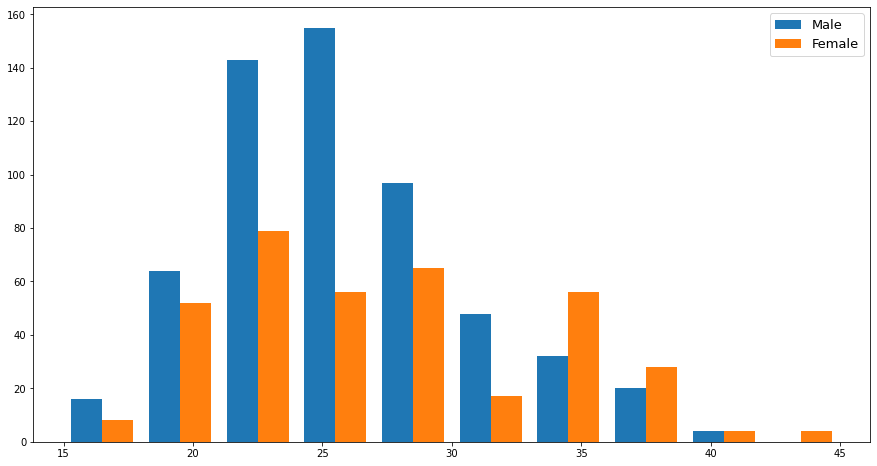

In [285]:
plt.figure(figsize=(15,8))
x = eda_dataset[eda_dataset['Gender']=='Male']['BMI']
y = eda_dataset[eda_dataset['Gender']=='Female']['BMI']
plt.hist([x, y],label=['Male','Female'])
plt.legend(fontsize=13)
plt.show()

From this graph, female patients tend to have higher BMI than male patients

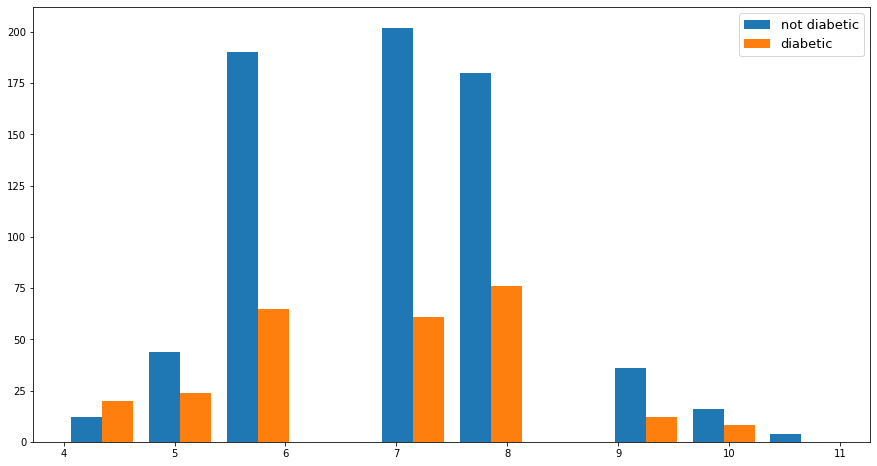

In [286]:
plt.figure(figsize=(15,8))
x = eda_dataset[eda_dataset['Diabetic']==0.0]['Sleep']
y = eda_dataset[eda_dataset['Diabetic']==1.0]['Sleep']
plt.hist([x, y],label=['not diabetic','diabetic'])
plt.legend(fontsize=13)
plt.show()

No evident trend between time of sleep and contracting diabetes, amount of sleep follows a Gaussian distribution

<AxesSubplot:xlabel='Sleep', ylabel='Smoking'>

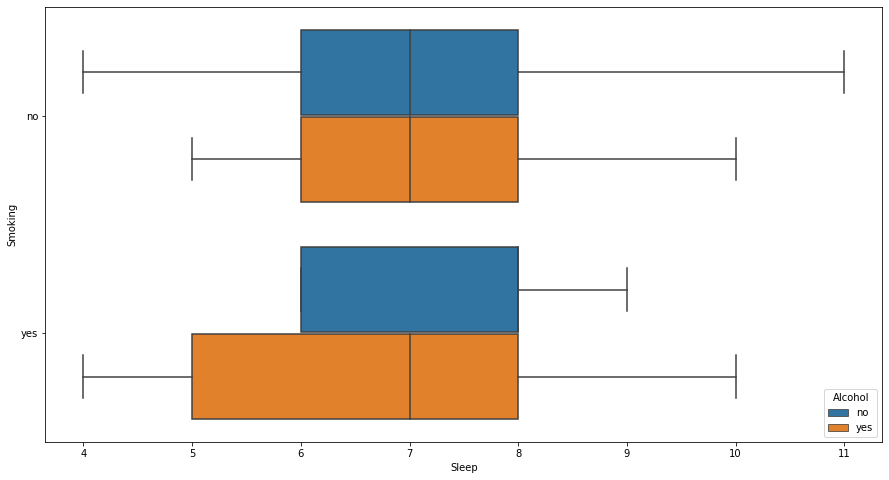

In [287]:
plt.figure(figsize=(15,8))
sns.boxplot(data = eda_dataset, x='Sleep', y='Smoking', hue = "Alcohol")

For amount of sleeping per day, smoking and alcohol are not evident indicators, although for those who don't smoke, the sleeping time tends to be more densly packed for the group which drinks alcohol. But for those who smoke, the sleeping time is more densly packed for the group that doesn't drink alcohol.

<AxesSubplot:xlabel='Sleep', ylabel='JunkFood'>

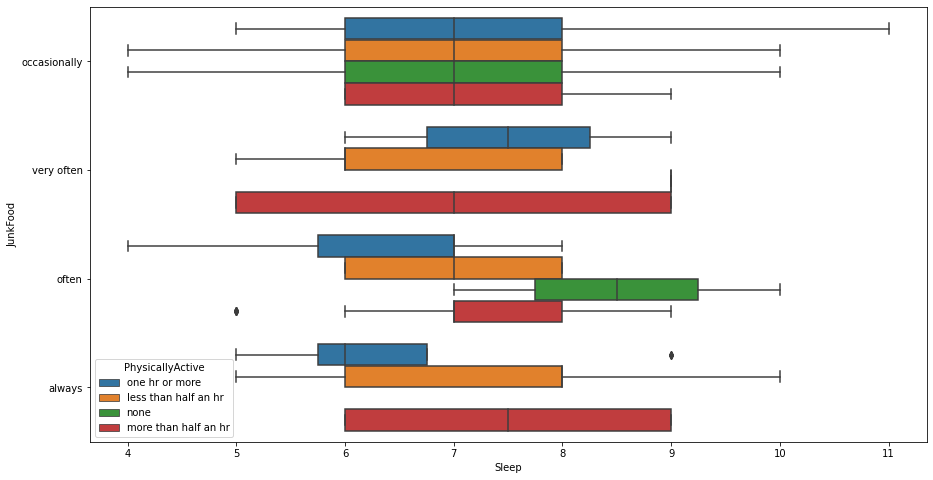

In [288]:
plt.figure(figsize=(15,8))
sns.boxplot(data = eda_dataset, x='Sleep', y='JunkFood', hue = "PhysicallyActive")

<AxesSubplot:xlabel='BPLevel', ylabel='count'>

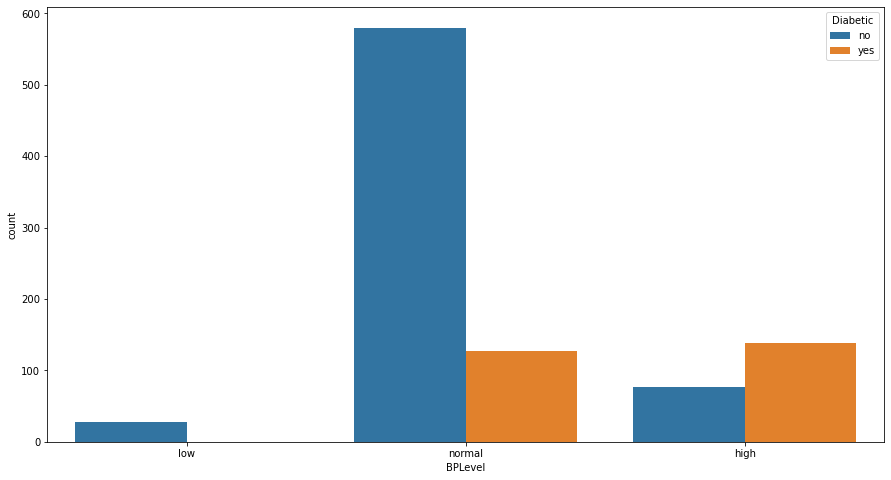

In [289]:
diabetes2 = pd.read_csv('diabetes_dataset.csv')

diabetes2['BPLevel'] = diabetes2['BPLevel'].apply(lowerupper)
diabetes2['Diabetic'] = diabetes2['Diabetic'].apply(lowerupper2)
plt.figure(figsize=(15,8))
sns.countplot(x='BPLevel', data=diabetes2, hue='Diabetic',order=['low','normal','high'])

# Machine learning model training

# Training/testing

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [308]:
pip install imbalanced-learn

     -------------------------------------- 258.3/258.3 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [309]:
from imblearn.over_sampling import SMOTENC

# We reorganized our datasets to bring together categorical and numerical data separately

In [291]:
diabetes3 = data[['BMI','Sleep','SoundSleep','pregnancies']]
data.drop(['BMI','Sleep','SoundSleep','pregnancies'], axis=1, inplace=True)

In [292]:
data = pd.concat([data,diabetes3],axis = 1)
data.head()

,Gender,Family_Diabetes,Smoking,Alcohol,RegularMedicine,Pdiabetes,UriationFreq,Diabetic,low BP,normal BP,no stress,occasional stress,healthy diet,unhealthy diet,0.5+ hr exercise,0 hr exercise,1+ hr exercise,50-59,60 or older,less than 40,high stress,very unhealthy diet,BMI,Sleep,SoundSleep,pregnancies
0,0,0,0,0,0.0,0,0,0.0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,39.0,8,6,0.0
1,0,0,0,0,1.0,0,0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,28.0,8,6,0.0
2,0,0,0,0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,24.0,6,6,0.0
3,0,0,0,0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,23.0,8,6,0.0
4,0,0,0,0,0.0,0,0,0.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,27.0,8,8,0.0


In [293]:
X = data.drop('Diabetic', axis=1)
y = data['Diabetic']

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3, stratify= y)

In [295]:
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size = 0.25, random_state = 3, stratify = y_train)

In [296]:
print(y_train.value_counts())
print(y_vali.value_counts())
print(y_test.value_counts())

0.0    356
1.0    139
Name: Diabetic, dtype: int64
0.0    120
1.0     46
Name: Diabetic, dtype: int64
0.0    204
1.0     80
Name: Diabetic, dtype: int64


In [310]:
def smote_data(X, y):
    smotenc = SMOTENC(sampling_strategy = 1.0, categorical_features = list(range(0,22)), random_state = 3)
    X_smote, y_smote = smotenc.fit_resample(X, y)
    return X_smote, y_smote
X_train_smote, y_train_smote = smote_data(X_train, y_train)

In [311]:
print(y_train_smote.value_counts())

1.0    356
0.0    356
Name: Diabetic, dtype: int64


# Decision tree model

In [312]:
dtree = DecisionTreeClassifier()

In [313]:
dtree.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [314]:
pred3 = dtree.predict(X_vali)

In [315]:
print(classification_report(y_vali, pred3))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       120
         1.0       0.93      0.91      0.92        46

    accuracy                           0.96       166
   macro avg       0.95      0.94      0.95       166
weighted avg       0.96      0.96      0.96       166



In [316]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, pred3)
metrics.auc(fpr, tpr)

0.9440217391304349

In [317]:
grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2,3,4]
        }

In [318]:
gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 3), param_grid = grid, scoring = 'recall',
                 refit = True, verbose = 1)
gs.fit(X_train_smote, y_train_smote)
gs.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'max_depth': 10, 'min_samples_split': 4}

In [319]:
gs_predictions = gs.predict(X_vali)
print(classification_report(y_vali, gs_predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       120
         1.0       0.93      0.85      0.89        46

    accuracy                           0.94       166
   macro avg       0.94      0.91      0.92       166
weighted avg       0.94      0.94      0.94       166



In [320]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, gs_predictions)
metrics.auc(fpr, tpr)

0.9114130434782608

After parameter tuning, the performance of the decision tree model decreases.

Let's "bagging" the decision tree with a random forest classifier to see if we can further optimize performance, such as increasing the recall rate of diabetics to more than 0.9.

"Bagging decision trees" through random forest models is one way to measure this.

# Random forest model

In [299]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [300]:
pred4 = rfc.predict(X_vali)

In [301]:
print(classification_report(y_vali, pred4))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       120
         1.0       0.95      0.91      0.93        46

    accuracy                           0.96       166
   macro avg       0.96      0.95      0.95       166
weighted avg       0.96      0.96      0.96       166



In [302]:
fpr, tpr, thresholds = metrics.roc_curve(y_vali, pred4)
metrics.auc(fpr, tpr)

0.9481884057971014

The forest model was unexpected, while retaining the precision and recall rate for the non-diabetic group and the accuracy of the diabetic group, the recall rate of the non-diabetic group reached 90%, and the overall Auc-Roc value of the model was 0.9414.

# Evaluating model performance on testing data

In [304]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred_test = rfc.predict(X_test)

In [305]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       204
         1.0       0.90      0.95      0.93        80

    accuracy                           0.96       284
   macro avg       0.94      0.96      0.95       284
weighted avg       0.96      0.96      0.96       284



In [306]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test)
metrics.auc(fpr, tpr)

0.9553921568627451

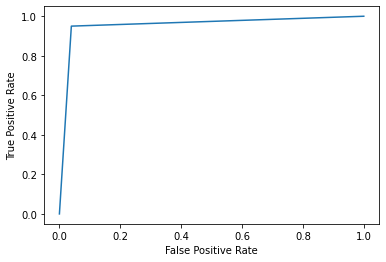

In [307]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()